In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report


### Data load and Encoder


In [4]:

# Load dataset
file_path = "data/fraud.csv"
df_fraud = pd.read_csv(file_path)

# Drop non-useful columns
df_fraud = df_fraud.drop(columns=['Transaction_ID', 'Timestamp'])

# Encode categorical variables
categorical_cols = ['Location', 'Transaction_Type']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_fraud[col] = le.fit_transform(df_fraud[col])
    label_encoders[col] = le

# Define features and target
X = df_fraud.drop(columns=['Is_Fraudulent'])
y = df_fraud['Is_Fraudulent']


### Feature Scaler and Selection


In [5]:

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)




### Model Evaluation and Prediction


Accuracy: 0.943

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       947
           1       0.00      0.00      0.00        53

    accuracy                           0.94      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.94      0.92      1000



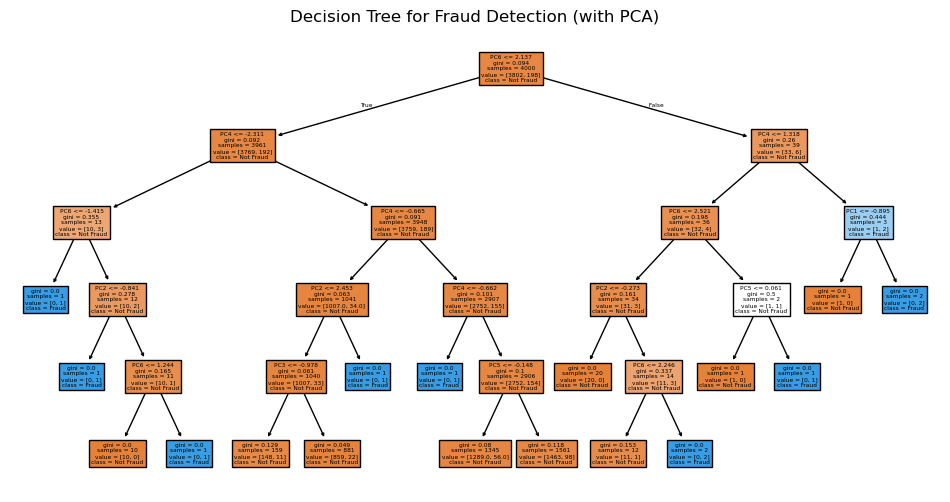

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt, filled=True, feature_names=[f'PC{i+1}' for i in range(X_pca.shape[1])], class_names=["Not Fraud", "Fraud"])
plt.title("Decision Tree for Fraud Detection (with PCA)")
plt.show()
